In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv(r"C:\Users\RGIPT\Documents\Classification\DATASET_ weka_679.csv")

In [3]:
df['SSA(m2/g)'] = df['SSA(m2/g)']/1000

In [4]:
df.head()

,SSA(m2/g),Pore size(nm),Pore Volume (cm3/g),Potential,Nitrogen %,Id/Ig,Specific Capacitance
0,0.63,1.50,0.0,0.25,0.0,0.0,80.0
1,1.00,1.75,0.0,0.25,0.0,0.0,125.0
2,1.50,2.50,0.0,0.25,0.0,0.0,175.0
3,1.40,2.90,0.0,0.25,0.0,0.0,160.0
4,0.85,1.25,0.0,0.25,0.0,0.0,95.0


In [5]:
df = df.rename(columns={'SSA(m2/g)': 'SSA','Pore size(nm)': 'PS', 'Pore Volume (cm3/g)': 'PV' , 'Nitrogen %':'NC' ,  'Specific Capacitance':'SC'})

In [6]:
df.head()

,SSA,PS,PV,Potential,NC,Id/Ig,SC
0,0.63,1.50,0.0,0.25,0.0,0.0,80.0
1,1.00,1.75,0.0,0.25,0.0,0.0,125.0
2,1.50,2.50,0.0,0.25,0.0,0.0,175.0
3,1.40,2.90,0.0,0.25,0.0,0.0,160.0
4,0.85,1.25,0.0,0.25,0.0,0.0,95.0


In [7]:
df.describe()

,SSA,PS,PV,Potential,NC,Id/Ig,SC
count,558.000000,558.000000,558.000000,558.000000,558.000000,558.000000,558.000000
mean,1.166802,1.714821,0.867994,1.296057,1.329385,0.555733,188.130824
std,0.883202,2.616503,0.861877,0.792527,2.875535,0.798127,104.478231
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.461500,0.000000,0.238000,1.000000,0.000000,0.000000,120.000000
50%,1.016700,0.900000,0.690000,1.000000,0.000000,0.000000,176.500000
75%,1.641000,2.522500,1.295000,1.000000,1.137500,0.997500,247.750000
max,4.073000,27.200000,5.910000,4.000000,19.800000,4.540000,587.000000


In [8]:
# To select all columns except the last one for X1, and the last column for y1:
X = df.iloc[:, :-1]  # Select all columns except the last one for features (X1)
y = df.iloc[:, -1]   # Select the last column as the target (y1)

In [9]:
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split, learning_curve
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
X_train

,SSA,PS,PV,Potential,NC,Id/Ig
182,0.477,1.96,0.230,1.0,0.00,1.01
89,0.000,0.00,0.000,0.8,0.00,1.12
185,2.086,2.10,1.100,1.0,0.00,0.00
148,1.578,0.00,1.092,1.2,0.68,0.00
204,0.521,0.00,0.380,1.0,7.30,1.00
...,...,...,...,...,...,...
71,3.110,0.70,1.680,1.0,0.00,0.00
106,0.787,5.81,1.140,1.0,0.00,0.00
270,1.588,0.00,1.010,0.9,5.30,0.84
435,1.417,2.22,1.560,1.0,1.99,1.01


In [11]:
#Scaler technique
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaler = scaler.fit_transform(X_train)
X_test_scaler = scaler.transform(X_test)

In [12]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

Feature Importance Scores:
     Feature  Importance
4         NC    0.312422
3  Potential    0.245285
0        SSA    0.143857
5      Id/Ig    0.100587
1         PS    0.099032
2         PV    0.098817


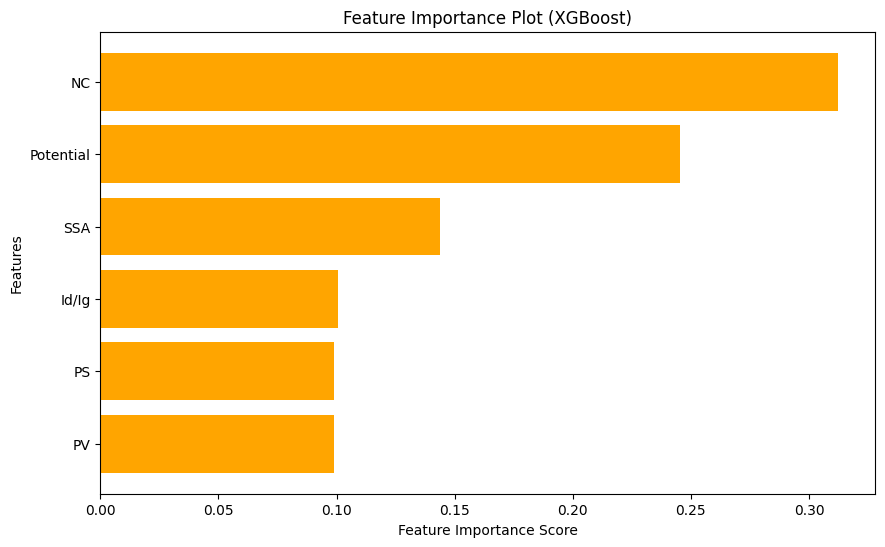

In [13]:

# Initialize and train an XGBoost Regressor
xgb_model = xgb.XGBRegressor(random_state=42, n_estimators=100)
xgb_model.fit(X_train, y_train)

# Get feature importance scores
feature_importances = xgb_model.feature_importances_

# Create a DataFrame for better visualization
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Print the feature importance scores
print("Feature Importance Scores:")
print(importance_df)
# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='orange')
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title('Feature Importance Plot (XGBoost)')
plt.gca().invert_yaxis()  # To display the most important feature on top
plt.show()


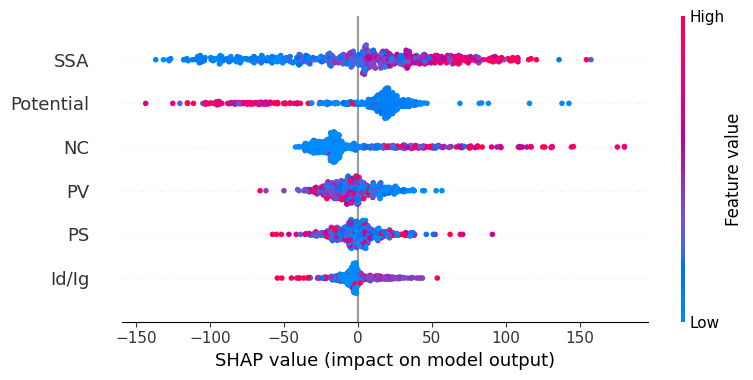

In [14]:
import shap
explainer = shap.TreeExplainer(xgb_model)
shap_values = explainer.shap_values(X)

# Plot SHAP summary plot
shap.summary_plot(shap_values, X)

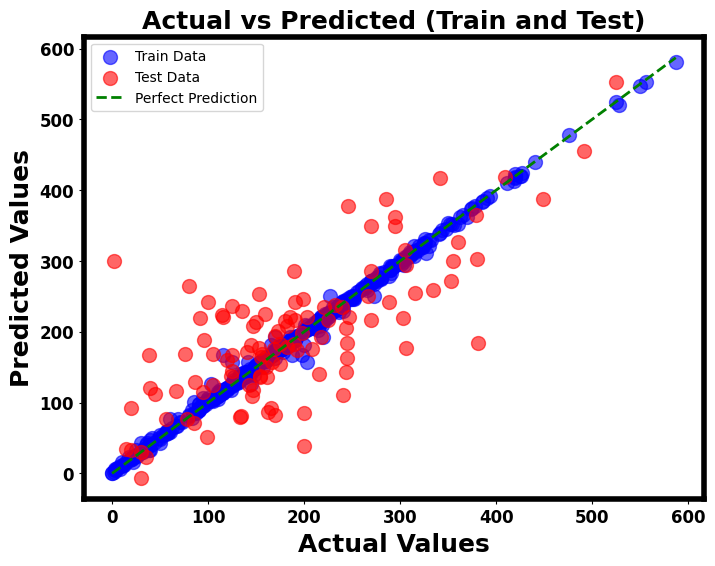

In [15]:
# Make predictions on both train and test data
y_train_pred = xgb_model.predict(X_train)
y_test_pred = xgb_model.predict(X_test)

# Plot actual vs predicted values for training and testing data
plt.figure(figsize=(8, 6))

# Plot for training data
plt.scatter(y_train, y_train_pred, color='blue', s=100, label='Train Data', alpha=0.6)

# Plot for testing data
plt.scatter(y_test, y_test_pred, color='red', s=100, label='Test Data', alpha=0.6)

# Plot a perfect prediction line
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='green', linewidth=2, linestyle='--', label='Perfect Prediction')

# Labels and title
plt.xlabel("Actual Values", fontweight="bold", fontsize=18)  # Bold x-axis label
plt.ylabel("Predicted Values", fontweight="bold", fontsize=18)  # Bold y-axis label
plt.title("Actual vs Predicted (Train and Test)", fontweight="bold", fontsize=18)
plt.legend()

#Make x-axis and y-axis numbers bold
plt.xticks(fontsize=12, fontweight='bold')  # Bold x-axis numbers
plt.yticks(fontsize=12, fontweight='bold')  # Bold y-axis numbers



# Bold black outline for the figure
plt.gca().spines["top"].set_linewidth(4)   # Top border
plt.gca().spines["right"].set_linewidth(4) # Right border
plt.gca().spines["bottom"].set_linewidth(4) # Bottom border
plt.gca().spines["left"].set_linewidth(4)  # Left border

plt.gca().spines["top"].set_color("black")
plt.gca().spines["right"].set_color("black")
plt.gca().spines["bottom"].set_color("black")
plt.gca().spines["left"].set_color("black")
plt.show()

In [16]:
# Create a DataFrame for better visualization
xg_df = pd.DataFrame({
    'Actual_SC': y_test,
    'Predicted_SC': y_test_pred
})
print(xg_df)

     Actual_SC  Predicted_SC
158      378.5    364.433990
451      360.0    326.407623
55       156.0    168.542923
247      145.0    181.819672
70       295.0    349.230713
..         ...           ...
11       333.9    259.024597
374      246.0    377.747101
22       225.0    217.302872
381      161.0    136.678741
373      208.0    175.881851

[112 rows x 2 columns]


In [17]:
# Save to Excel
xg_df.to_excel('xg_df.xlsx', index=False)

In [18]:
# Create a DataFrame for better visualization
xg_df_train = pd.DataFrame({
    'Actual_SC': y_train,
    'Predicted_SC': y_train_pred
})
print(xg_df_train)
xg_df_train.to_excel('xg_df_train.xlsx', index=False)

     Actual_SC  Predicted_SC
182       80.0     82.887016
89       228.0    227.065170
185      250.0    247.639252
148      310.0    307.394165
204      273.0    250.763947
..         ...           ...
71       280.0    281.651398
106      177.0    176.661545
270      240.4    242.163147
435      190.0    191.347626
102      193.0    193.493088

[446 rows x 2 columns]
